In [209]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [210]:
import spacy
import pandas as pd

In [211]:
spacy.cli.download("en_core_web_sm")

DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0-py3-none-any.whl#egg=en_core_web_sm==3.0.0 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 3.4 MB/s eta 0:00:0000:0100:01m
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [212]:
! python -m spacy download en_core_web_sm


DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0-py3-none-any.whl#egg=en_core_web_sm==3.0.0 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0-py3-none-any.whl (13.7 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [213]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(word_list):
    return [word for word in word_list if word not in stop_words]

In [214]:


# Load the spaCy NER model
nlp = spacy.load("en_core_web_sm")

#  text
with open("Useful_Knowledge_Texts/Clipped_Texts/Chambers_InfoForPeople_France_1835.txt", "r", encoding="utf-8") as text_file:
    text = text_file.read()

# Process the text with spaCy
doc = nlp(text)

# Initialize lists to store tokens and labels
tokens = []
labels = []

# Iterate through the processed tokens
for token in doc:
    tokens.append(token.text)
    
    # If the token has an entity label, add it; otherwise, add "O" for untagged
    if token.ent_type_:
        labels.append(token.ent_type_)
    else:
        labels.append("O")

# Now, 'tokens' contains the tokens, and 'labels' contains the corresponding labels
spacy_annotations = list(zip(tokens, labels))

In [215]:

def merge_iob_tokens(annotations):
    merged_annotations = []
    current_entity = None
    current_tokens = []

    for token, label in annotations:
        if label == 'O':
            # 'O' tag, no merging needed
            if current_entity:
                merged_annotations.append((' '.join(current_tokens), current_entity))
                current_entity = None
                current_tokens = []
            merged_annotations.append((token, 'O'))
        else:
            iob_prefix, entity = label.split('-')
            
            if iob_prefix == 'B':
                # Start a new entity
                if current_entity:
                    merged_annotations.append((' '.join(current_tokens), current_entity))
                    current_tokens = []
                current_entity = entity
                current_tokens = [token]
            elif iob_prefix == 'I':
                # Continue the current entity
                if current_entity == entity:
                    current_tokens.append(token)
                else:
                    # Start a new entity if the entity type changes
                    if current_entity:
                        merged_annotations.append((' '.join(current_tokens), current_entity))
                        current_tokens = []
                    current_entity = entity

    # Append the last entity if any
    if current_entity:
        merged_annotations.append((' '.join(current_tokens), current_entity))

    return merged_annotations


In [216]:
def get_spacy_annotation_strings(text_file_path):
    nlp = spacy.load("en_core_web_sm")


    with open(text_file_path, "r", encoding="utf-8") as text_file:
        text = text_file.read()

    doc = nlp(text)

    tokens = []
    labels = []


    for token in doc:
        tokens.append(token.text)

        if token.ent_type_:
            labels.append(token.ent_type_)
        else:
            labels.append("O")

    spacy_annotations = list(zip(tokens, labels))

    spacy_annotated_list = []

    for token, tag in spacy_annotations:
        tagged_tokens = str(token + '_' + tag)
        spacy_annotated_list.append(tagged_tokens)

    cleaned_spacy_list_1 = [token.rstrip('_O') if '_O' in token else token for token in spacy_annotated_list]

    filtered_spacy_list_1 = remove_stopwords(cleaned_spacy_list_1)

    spacy_annotations_series_1 = pd.Series(filtered_spacy_list_1)

    spacy_annotations_series_cleaned_1 = spacy_annotations_series_1.str.replace(r'\W+', '', regex=True)

    spacy_series_scrubbed_1 = spacy_annotations_series_cleaned_1[spacy_annotations_series_cleaned_1 != ''].dropna()

    spacy_list_scrubbed_1 = list(spacy_series_scrubbed_1)


    return spacy_list_scrubbed_1

        

In [217]:
hand_annotated_data = []
with open("Useful_Knowledge_Annotations_iob_3/DOCUMENT-omonroe2_illinois_edu/Chambers_InfoForPeople_France_1835.txt.tsv", "r", encoding="utf-8") as iob_file:
    for line in iob_file:
        line = line.strip()
        if line:
            token, label = line.split("\t")
           
            hand_annotated_data.append((token, label))

In [218]:
print(len(hand_annotated_data))
hand_annotated_data

2990


[('he', 'O'),
 ('principal', 'O'),
 ('mountains', 'O'),
 ('of', 'O'),
 ('France', 'B-GPE'),
 ('are', 'O'),
 (',', 'O'),
 ('1', 'B-CARDINAL'),
 ('.', 'O'),
 ('The', 'O'),
 ('Toeget', 'O'),
 ('on', 'O'),
 ('the', 'O'),
 ('north', 'O'),
 ('-', 'O'),
 ('east', 'O'),
 ('.', 'O'),
 ('They', 'O'),
 ('are', 'O'),
 ('of', 'O'),
 ('a', 'O'),
 ('rounded', 'O'),
 ('oat', 'O'),
 ('-', 'O'),
 ('Bne', 'O'),
 (',', 'O'),
 ('with', 'O'),
 ('gentle', 'O'),
 ('slopes', 'O'),
 (',', 'O'),
 ('and', 'O'),
 ('afford', 'O'),
 ('much', 'O'),
 ('open', 'O'),
 ('paa', 'O'),
 ('-', 'O'),
 ('turage', 'O'),
 ('.', 'O'),
 ('The', 'O'),
 ('highest', 'O'),
 ('summit', 'O'),
 ('is', 'O'),
 ('not', 'O'),
 ('more', 'O'),
 ('than', 'O'),
 ('4500', 'B-QUANTITY'),
 ('ftet', 'O'),
 ('nigh', 'O'),
 ('.', 'O'),
 ('2', 'O'),
 ('.', 'O'),
 ('The', 'O'),
 ('Jura', 'B-LOC'),
 ('mountains', 'I-LOC'),
 ('He', 'O'),
 ('to', 'O'),
 ('the', 'O'),
 ('south', 'O'),
 ('of', 'O'),
 ('these', 'O'),
 (',', 'O'),
 ('and', 'O'),
 ('their', 'O'

In [219]:
merged_hand_annotations = merge_iob_tokens(hand_annotated_data)
print(len(merged_hand_annotations))
merged_hand_annotations

2706


[('he', 'O'),
 ('principal', 'O'),
 ('mountains', 'O'),
 ('of', 'O'),
 ('France', 'GPE'),
 ('are', 'O'),
 (',', 'O'),
 ('1', 'CARDINAL'),
 ('.', 'O'),
 ('The', 'O'),
 ('Toeget', 'O'),
 ('on', 'O'),
 ('the', 'O'),
 ('north', 'O'),
 ('-', 'O'),
 ('east', 'O'),
 ('.', 'O'),
 ('They', 'O'),
 ('are', 'O'),
 ('of', 'O'),
 ('a', 'O'),
 ('rounded', 'O'),
 ('oat', 'O'),
 ('-', 'O'),
 ('Bne', 'O'),
 (',', 'O'),
 ('with', 'O'),
 ('gentle', 'O'),
 ('slopes', 'O'),
 (',', 'O'),
 ('and', 'O'),
 ('afford', 'O'),
 ('much', 'O'),
 ('open', 'O'),
 ('paa', 'O'),
 ('-', 'O'),
 ('turage', 'O'),
 ('.', 'O'),
 ('The', 'O'),
 ('highest', 'O'),
 ('summit', 'O'),
 ('is', 'O'),
 ('not', 'O'),
 ('more', 'O'),
 ('than', 'O'),
 ('4500', 'QUANTITY'),
 ('ftet', 'O'),
 ('nigh', 'O'),
 ('.', 'O'),
 ('2', 'O'),
 ('.', 'O'),
 ('The', 'O'),
 ('Jura mountains', 'LOC'),
 ('He', 'O'),
 ('to', 'O'),
 ('the', 'O'),
 ('south', 'O'),
 ('of', 'O'),
 ('these', 'O'),
 (',', 'O'),
 ('and', 'O'),
 ('their', 'O'),
 ('summiu', 'O'),
 (

Doc 2 (Chambers 1839) EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS

Micro PRECISION score for subsets = 0.7637037037037037
Weighted PRECISION score for subsets = 0.7602377092026144

Micro RECALL score for subsets = 0.7637037037037037
Weighted RECALL score for subsets = 0.7637037037037037

Micro F1 score for subsets = 0.7637037037037037
Weighted F1 score for subsets = 0.7618121237221112

Individual label performance: 
Accuracy score:  0.7637037037037037
              precision    recall  f1-score   support

    CARDINAL       0.01      0.06      0.02        16
        DATE       0.11      0.08      0.09        62
       EVENT       0.00      0.00      0.00         5
         FAC       0.00      0.00      0.00        19
         GPE       0.05      0.04      0.05        47
    LANGUAGE       0.00      0.00      0.00         0
         LAW       0.00      0.00      0.00         1
         LOC       0.00      0.00      0.00        43
       MONEY       0.07      0.06      0.0

/Users/owenmonroe/anaconda3/envs/textminingvis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/owenmonroe/anaconda3/envs/textminingvis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/owenmonroe/anaconda3/envs/textminingvis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(re

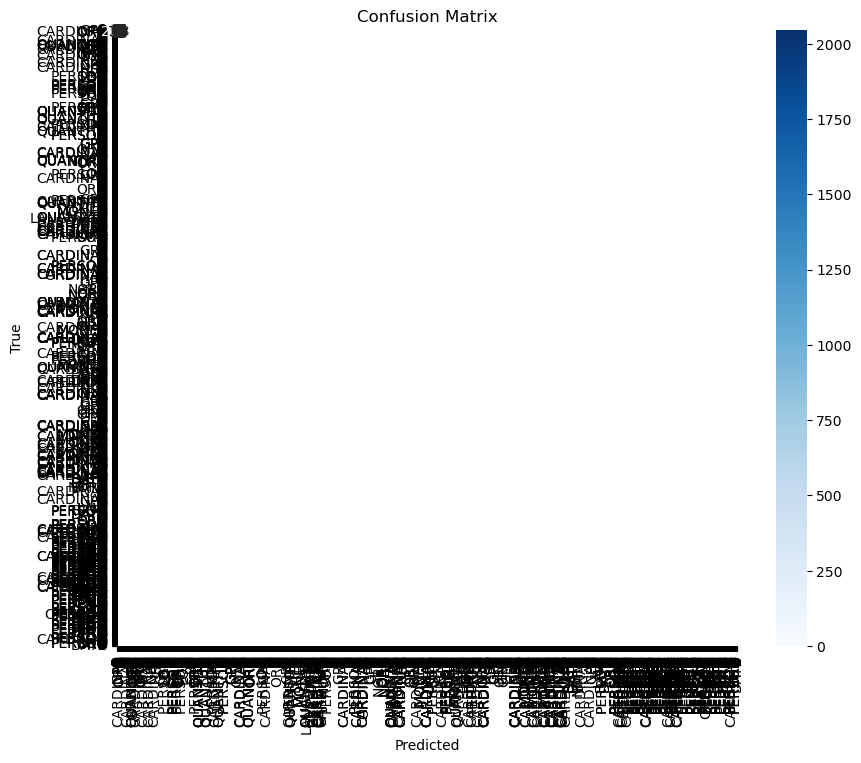

In [220]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

hand_subset_1 = merged_hand_annotations[:2700]
spacy_subset_1 = spacy_annotations[:2700]

y_true_1 = [label for token, label in hand_subset_1]
y_pred_1 = [label for token, label in spacy_subset_1]

prec_score_micro_2 = precision_score(y_true_1, y_pred_1, average='micro')
prec_score_weighted_2 = precision_score(y_true_1, y_pred_1, average='weighted')

rec_score_micro_2 = recall_score(y_true_1, y_pred_1, average='micro')
rec_score_weighted_2 = recall_score(y_true_1, y_pred_1, average='weighted')

f1_score_micro_2 = f1_score(y_true_1, y_pred_1, average='micro')
f1_score_weighted_2 = f1_score(y_true_1, y_pred_1, average='weighted')



print("Doc 2 (Chambers 1839) EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS")
print()
print(f'Micro PRECISION score for subsets = {prec_score_micro_2}')
print(f'Weighted PRECISION score for subsets = {prec_score_weighted_2}')
print()
print(f'Micro RECALL score for subsets = {rec_score_micro_2}')
print(f'Weighted RECALL score for subsets = {rec_score_weighted_2}')
print()
print(f'Micro F1 score for subsets = {f1_score_micro_2}')
print(f'Weighted F1 score for subsets = {f1_score_weighted_2}')
print()
print ("Individual label performance: ")
print ("Accuracy score: ", accuracy_score(y_true_1, y_pred_1))
print (classification_report(y_true_1, y_pred_1))


labels_2 = sorted(list(set(y_true_1 + y_pred_1)))

conf_matrix_2 = confusion_matrix(y_true_1, y_pred_1, labels=labels_2)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [221]:
spacy_annotations

spacy_annotated_list = []

for token, tag in spacy_annotations:
    tagged_tokens = str(token + '_' + tag)
    spacy_annotated_list.append(tagged_tokens)




In [222]:
cleaned_spacy_list_1 = [token.rstrip('_O') if '_O' in token else token for token in spacy_annotated_list]


In [223]:
cleaned_spacy_list_1

['he',
 'principal',
 'mountains',
 'of',
 'France_GPE',
 'are',
 ',',
 '1_CARDINAL',
 '.',
 'The_ORG',
 '\n _ORG',
 'Toeget_ORG',
 'on',
 'the',
 'north',
 '-',
 'east',
 '.',
 'They',
 'are',
 'of',
 'a',
 'rounded',
 'oat-',
 '\n ',
 'Bne',
 ',',
 'with',
 'gentle',
 'slopes',
 ',',
 'and',
 'afford',
 'much',
 'open',
 'paa-',
 '\n ',
 'turage',
 '.',
 'The',
 'highest',
 'summit',
 'is',
 'not',
 'more',
 'than',
 '4500',
 '\n ',
 'ftet',
 'nigh',
 '.',
 '2_CARDINAL',
 '.',
 'The',
 'Jura',
 'mountains',
 'He',
 'to',
 'the',
 'south',
 'of',
 '\n ',
 'these',
 ',',
 'and',
 'their',
 'summiu',
 'rise',
 'to',
 'the',
 'height',
 'of',
 '0000_QUANTITY',
 '\n _QUANTITY',
 'feet_QUANTITY',
 '.',
 '3_CARDINAL',
 '.',
 'Many',
 'Alpine_ORG',
 'branches',
 'intersect',
 'Daaphlny_ORG',
 '\n _ORG',
 'and',
 'Provence_GPE',
 '.',
 'In',
 'the',
 'ceotre',
 'of',
 'the',
 'kingdom',
 'are',
 ',',
 '4_CARDINAL',
 '.',
 '\n ',
 'The',
 'mountains',
 'of',
 'Auvergne_GPE',
 ',',
 'of',
 'vol

In [224]:
filtered_spacy_list_1 = remove_stopwords(cleaned_spacy_list_1)

In [225]:


spacy_annotations_series_1 = pd.Series(filtered_spacy_list_1)



In [226]:
spacy_annotations_series_cleaned_1 = spacy_annotations_series_1.str.replace(r'\W+', '', regex=True)

In [227]:
spacy_series_scrubbed_1 = spacy_annotations_series_cleaned_1[spacy_annotations_series_cleaned_1 != ''].dropna()

In [228]:
spacy_series_scrubbed_1

0         principal
1         mountains
2        France_GPE
4        1_CARDINAL
6           The_ORG
           ...     
2281         of_ORG
2282    Orleans_ORG
2284            waa
2286           born
2287      1810_DATE
Length: 1533, dtype: object

In [229]:
spacy_list_scrubbed_1 = list(spacy_series_scrubbed_1)

In [230]:
spacy_list_scrubbed_1

spacy_str_scrubbed_1 = ' '.join(spacy_list_scrubbed_1)
spacy_str_scrubbed_1

'principal mountains France_GPE 1_CARDINAL The_ORG _ORG Toeget_ORG north east They rounded oat Bne gentle slopes afford much open paa turage The highest summit 4500 ftet nigh 2_CARDINAL The Jura mountains He south summiu rise height 0000_QUANTITY _QUANTITY feet_QUANTITY 3_CARDINAL Many Alpine_ORG branches intersect Daaphlny_ORG _ORG Provence_GPE In ceotre kingdom 4_CARDINAL The mountains Auvergne_GPE volcamo origin the_FAC Puy_FAC de_FAC Dome_FAC Moots dOr the_ORG _ORG Cental_ORG principal groups 5_CARDINAL The Cerennee Be south east range last mentioned Their highest summit Is Mont Lozcre C510 Ihet 0_CARDINAL The Pyrenees form prlnnipai part boundary France_GPE Spain_GPE These moun tains divide couutry four_CARDINAL great basins form exposure necessarily great influence climate productions The nar row valley Rhine_GPE runs nortli ioutIi open basins Seine_PERSON Loire_ORG the_LOC _LOC Garonne_LOC stretch iu north wesltrn direction The Adour rises Pyrenees washes walls Bayonne The river

In [231]:
def get_hand_annotation_string(hand_annotation_file_path):

    hand_annotated_data = []
    with open(hand_annotation_file_path, "r", encoding="utf-8") as iob_file:
        for line in iob_file:
            line = line.strip()
            if line:
                token, label = line.split("\t")
           
                hand_annotated_data.append((token, label))

    merged_hand_annotations = merge_iob_tokens(hand_annotated_data)

    hand_annotated_list = []

    for token, tag in merged_hand_annotations:
        tagged_tokens = str(token + '_' + tag)
        hand_annotated_list.append(tagged_tokens)

    cleaned_hand_list_1 = [token.rstrip('_O') if '_O' in token else token for token in hand_annotated_list]

    filtered_hand_list_1 = remove_stopwords(cleaned_hand_list_1)

    hand_annotations_series_1 = pd.Series(filtered_hand_list_1)

    hand_annotations_series_cleaned_1 = hand_annotations_series_1.str.replace(r'\W+', '', regex=True)

    hand_series_scrubbed_1 = hand_annotations_series_cleaned_1[hand_annotations_series_cleaned_1 != ''].dropna()

    hand_list_scrubbed_1 = list(hand_series_scrubbed_1)


    return hand_list_scrubbed_1



In [232]:
# to topic model must be a series of documents....

In [249]:
hand_list_scrubbed_1 = get_hand_annotation_string('Useful_Knowledge_Annotations_iob_3/DOCUMENT-omonroe2_illinois_edu/Chambers_InfoForPeople_France_1835.txt.tsv')

hand_list_scrubbed_2 = get_hand_annotation_string('Useful_Knowledge_Annotations_iob_3/DOCUMENT-omonroe2_illinois_edu/Chambers_Journal_literature_Jan26_1839.txt.tsv')

hand_list_scrubbed_3 = get_hand_annotation_string('Useful_Knowledge_Annotations_iob_3/DOCUMENT-omonroe2_illinois_edu/Chambers_Journal_monastery_1851.txt.tsv')

In [251]:
hand_list_scrubbed_2

['p',
 '1',
 '17',
 'EDINBURGIT_GPE',
 'CHAMBERS_PERSON',
 'UE',
 'J',
 'CONDUCTED',
 'BY',
 'WILLIAM_PERSON',
 'AND',
 'ROBERTCHAMBERS_PERSON',
 'EDITORS',
 'OF',
 'CHAMBERS_PERSON',
 'S',
 'INFORMATION',
 'FOR',
 'THE',
 'PEOPLE',
 'CHAMBERS',
 'S',
 'EDUCATIONAL',
 'COURSE',
 'c',
 'PRINTED',
 'BY',
 'BRADBURY_PERSON',
 'AND',
 'EVANS_PERSON',
 'WHITEFRIARS_GPE',
 'LONDON',
 'NUMBER',
 '365',
 'SATURDAYJANUARY261839_DATE',
 'PRICE',
 'THREEHALFPENSE_MONEY',
 'WHAT',
 'ENGLISH',
 'LITERATURE',
 'GIVES',
 'US',
 'loads',
 'meat_PRODUCT',
 'country',
 'Surely',
 'readily',
 'suppose',
 'must',
 'ENGLISH',
 'literature',
 'gives',
 'enjoy',
 'fund',
 'recollection',
 'things',
 'something',
 'essentially',
 'different',
 'The',
 'first',
 'reading',
 'Crusoe_WORK_OF_ART',
 'pleasure',
 'great',
 'amount',
 'still',
 'better',
 'solid',
 'philosophy',
 'Going',
 'back',
 'little',
 'feature',
 'every',
 'man',
 'biography',
 'Gulliver_WORK_OF_ART',
 'apt',
 'quite',
 'aware',
 'till',
 '

In [235]:
hand_str_scrubbed_3

['VISIT',
 'T',
 'AN',
 'ENGLISH',
 'MONASTERY_FAC',
 'I',
 'HAVE',
 'always',
 'felt',
 'deep',
 'interest',
 'monks_NORP',
 'monkery_NORP',
 'interest',
 'commence',
 'historical',
 'period',
 'may',
 'traced',
 'far',
 'back',
 'fabulous',
 'Radcliffianera_DATE',
 'I',
 'knew',
 'course',
 'I',
 'received',
 'venerable',
 'looking',
 'monk',
 'monks',
 'England_GPE',
 'could',
 'never',
 'believe',
 'light',
 'drab',
 'habit',
 'reaching',
 'ankles',
 'anything',
 'imitation',
 'monks',
 'An',
 'Italian',
 'much',
 'kindness',
 'manner',
 'bade',
 'welcome',
 'He',
 'con',
 'Spanish',
 'monk',
 'I',
 'could',
 'understand',
 'spite',
 'ducted',
 'inner',
 'room',
 'Gatehouse_LOC',
 'I',
 'chronic',
 'revolution_EVENT',
 'going',
 'I',
 'alto',
 'wrote',
 'name',
 'visitors',
 'book',
 'gether',
 'withdrawn',
 'faith',
 'French',
 'monk',
 'But',
 'crossed',
 'quadrangular',
 'court',
 'GuestHall_LOC',
 'English',
 'monk',
 'seemed',
 'highly',
 'improbable',
 'I',
 'tea',
 'refreshm

In [252]:
spacy_list_scrubbed_2 = get_spacy_annotation_strings('Useful_Knowledge_Texts/Clipped_Texts/Chambers_Journal_literature_Jan26_1839.txt')

In [253]:
spacy_list_scrubbed_3 = get_spacy_annotation_strings('Useful_Knowledge_Texts/Clipped_Texts/Chambers_Journal_monastery_1851.txt')

In [254]:
spacy_list_scrubbed_2

['_MONEY',
 'p',
 '1_CARDINAL',
 '17_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 '_MONEY',
 'EDINBURGIT',
 'CHAMBERS',
 'UE',
 'JO_PERSON',
 '_PERSON',
 'CONDUCTED',
 'BY',
 'WILLIAM',
 'AND',
 'ROBERT_PERSON',
 'CHAMBERS_PERSON',
 'EDITORS',
 'OF',
 'CHAMBERS',
 'S',
 'INFORMATION',
 'FOR',
 'THE',
 'PEOPLE',
 'CHAMBERS',
 'S',
 'EDUCATIONAL',
 'COURSE',
 'c',
 'PRINTED',
 'BY',
 'BRADBURY',
 'AND',
 'EVANS_PERSON',
 'WHITEFRIARS_GPE',
 'LONDON_GPE',
 'NUMBER',
 '365_CARDINAL',
 'SATURDAY_DATE',
 'JANUARY_DATE',
 '26_DATE'

In [239]:
spacy_str_scrubbed_3

['VISIT',
 'T',
 'AN',
 'ENGLISH',
 'MONASTERY',
 'I',
 'HAVE',
 'always',
 'felt',
 'deep',
 'interest',
 'monks',
 'monkery',
 'interest',
 'commence',
 'historical',
 'period',
 'may',
 'traced',
 'far',
 'back',
 'fabulous',
 'Radcliffian_NORP',
 'era',
 'I',
 'knew',
 'course',
 'I',
 'received',
 'venerable',
 'looking',
 'monk',
 'monks',
 'England_GPE',
 'could',
 'never',
 'believe',
 'light',
 'drab',
 'habit',
 'reaching',
 'ankles',
 'anything',
 'imitation',
 'monks',
 'An',
 'Italian_NORP',
 'much',
 'kindness',
 'manner',
 'bade',
 'welcome',
 'He',
 'con',
 'Spanish_NORP',
 'monk',
 'I',
 'could',
 'understand',
 'spite',
 'ducted',
 'inner',
 'room',
 'Gate_ORG',
 'house',
 'I',
 'chronic',
 'revolution',
 'going',
 'I',
 'alto',
 'wrote',
 'name',
 'visitors',
 'book',
 'gether',
 'withdrawn',
 'faith',
 'French_NORP',
 'monk',
 'But',
 'crossed',
 'quadrangular',
 'court',
 'the_ORG',
 'Guest_ORG',
 '_ORG',
 'Hall_ORG',
 'English_LANGUAGE',
 'monk',
 'seemed',
 'high

In [240]:
spacy_hand_annotations_df = pd.DataFrame()

In [241]:
spacy_hand_annotations_df

""


In [242]:
spacy_hand_annotations_df = pd.DataFrame(columns=['Text', 'Spacy Annotations', 'Hand Annotations'])

In [243]:
spacy_hand_annotations_df

,Text,Spacy Annotations,Hand Annotations


In [255]:
data_row_1 = {'Text': 'Doc 1 - Info 1835', 'Spacy Annotations': spacy_list_scrubbed_1 , 'Hand Annotations' : hand_list_scrubbed_1}

data_row_2 = {'Text': 'Doc 2 - Chambers Journal 1839', 'Spacy Annotations': spacy_list_scrubbed_2 , 'Hand Annotations' : hand_list_scrubbed_2}

data_row_3 = {'Text': 'Doc 3 - Chambers Journal 1851', 'Spacy Annotations': spacy_list_scrubbed_3 , 'Hand Annotations' : hand_list_scrubbed_3}

In [256]:
spacy_hand_annotations_df.loc[0] = data_row_1
spacy_hand_annotations_df.loc[1] = data_row_2
spacy_hand_annotations_df.loc[2] = data_row_3

In [257]:
spacy_hand_annotations_df

,Text,Spacy Annotations,Hand Annotations
0,Doc 1 - Info 1835,"[principal, mountains, France_GPE, 1_CARDINAL,...","[principal, mountains, France_GPE, 1_CARDINAL,..."
1,Doc 2 - Chambers Journal 1839,"[_MONEY, p, 1_CARDINAL, 17_MONEY, _MONEY, _MON...","[p, 1, 17, EDINBURGIT_GPE, CHAMBERS_PERSON, UE..."
2,Doc 3 - Chambers Journal 1851,"[VISIT, T, AN, ENGLISH, MONASTERY, I, HAVE, al...","[VISIT, T, AN, ENGLISH, MONASTERY_FAC, I, HAVE..."


In [258]:
spacy_hand_annotations_df['Hand Annotations']

0    [principal, mountains, France_GPE, 1_CARDINAL,...
1    [p, 1, 17, EDINBURGIT_GPE, CHAMBERS_PERSON, UE...
2    [VISIT, T, AN, ENGLISH, MONASTERY_FAC, I, HAVE...
Name: Hand Annotations, dtype: object

In [261]:
from gensim import corpora
import pprint
import pandas as pd
import numpy
import gensim
import nltk
import re
from gensim.models import Word2Vec, KeyedVectors, FastText
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath

hand_list_modeling = spacy_hand_annotations_df['Hand Annotations']

dictionary = corpora.Dictionary(hand_list_modeling)

dictionary.filter_extremes(no_below=5, no_above=0.2, keep_n=10000)

hand_corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in hand_list_modeling]


hand_corpus_words = [[(dictionary[id], count) for id, count in line] for line in hand_corpus]
hand_corpus_words



[[('0', 5),
  ('00', 2),
  ('000', 2),
  ('0000', 1),
  ('000000_QUANTITY', 1),
  ('0000_QUANTITY', 1),
  ('009', 1),
  ('031_DATE', 1),
  ('1', 4),
  ('100000000kilogrammes_QUANTITY', 1),
  ('1024_DATE', 1),
  ('103050000_MONEY', 1),
  ('1035415552franos_MONEY', 1),
  ('105000000_QUANTITY', 1),
  ('107500000', 1),
  ('10795000', 1),
  ('1080_DATE', 1),
  ('1108_DATE', 1),
  ('11113_DATE', 1),
  ('113_DATE', 1),
  ('1180', 1),
  ('121', 1),
  ('1233_DATE', 1),
  ('1285_DATE', 1),
  ('1310_DATE', 1),
  ('1314_DATE', 1),
  ('1331_DATE', 1),
  ('1336_DATE', 1),
  ('133a3_DATE', 1),
  ('1350_DATE', 1),
  ('1370_DATE', 1),
  ('1380_DATE', 1),
  ('139094000_NORP', 1),
  ('14003_CARDINAL', 1),
  ('1401_DATE', 1),
  ('1407_DATE', 1),
  ('1433_DATE', 1),
  ('14458', 1),
  ('1463_DATE', 1),
  ('1515_DATE', 1),
  ('1547_DATE', 1),
  ('1550_DATE', 1),
  ('1560_DATE', 1),
  ('1574_DATE', 1),
  ('1580_DATE', 1),
  ('1610_DATE', 1),
  ('1643_DATE', 1),
  ('17', 2),
  ('1703_DATE', 1),
  ('1715_DATE',

In [264]:
lda_hand_5 = gensim.models.ldamodel.LdaModel(corpus=hand_corpus,
                                           id2word=dictionary,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [266]:
print('Hand Annotations, 5 Topics')
lda_hand_5.print_topics(num_words=20)

Hand Annotations, 5 Topics


[(0,
  '0.031*"I" + 0.006*"The" + 0.006*"monk" + 0.005*"time" + 0.004*"guest" + 0.004*"monks_NORP" + 0.004*"master" + 0.004*"church_FAC" + 0.004*"mass" + 0.003*"room" + 0.003*"figure" + 0.003*"would" + 0.003*"could" + 0.003*"place" + 0.003*"like" + 0.003*"found" + 0.003*"morning" + 0.003*"went" + 0.003*"round" + 0.003*"length"'),
 (1,
  '0.001*"I" + 0.001*"The" + 0.000*"one" + 0.000*"would" + 0.000*"time" + 0.000*"little" + 0.000*"died" + 0.000*"much" + 0.000*"s" + 0.000*"could" + 0.000*"ha" + 0.000*"us" + 0.000*"thing" + 0.000*"In" + 0.000*"great" + 0.000*"must" + 0.000*"ever" + 0.000*"may" + 0.000*"place" + 0.000*"day"'),
 (2,
  '0.029*"The" + 0.017*"died" + 0.008*"France_GPE" + 0.007*"In" + 0.004*"one" + 0.004*"value" + 0.004*"great" + 0.004*"number" + 0.004*"Is" + 0.003*"England_GPE" + 0.003*"0" + 0.003*"waa" + 0.003*"estimated" + 0.002*"world" + 0.002*"1" + 0.002*"best" + 0.002*"acres" + 0.002*"produce" + 0.002*"4" + 0.002*"f"'),
 (3,
  '0.001*"The" + 0.001*"I" + 0.000*"died" + 0.

In [267]:
spacy_list_modeling = spacy_hand_annotations_df['Spacy Annotations']

dictionary = corpora.Dictionary(spacy_list_modeling)

dictionary.filter_extremes(no_below=5, no_above=0.2, keep_n=10000)

spacy_corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in spacy_list_modeling]


spacy_corpus_words = [[(dictionary[id], count) for id, count in line] for line in spacy_corpus]
spacy_corpus_words

[[('0', 1),
  ('0000_QUANTITY', 1),
  ('00o', 1),
  ('01_CARDINAL', 1),
  ('031_CARDINAL', 1),
  ('0_CARDINAL', 1),
  ('1', 1),
  ('100000000_QUANTITY', 1),
  ('1024_DATE', 1),
  ('103050000_CARDINAL', 1),
  ('1035415552', 1),
  ('105000000_CARDINAL', 1),
  ('107500000', 1),
  ('10795000_QUANTITY', 1),
  ('1080', 1),
  ('1108_DATE', 1),
  ('11113_DATE', 1),
  ('113_CARDINAL', 1),
  ('1180_DATE', 1),
  ('121_CARDINAL', 1),
  ('1233', 1),
  ('1285_DATE', 1),
  ('1310', 1),
  ('1314_DATE', 1),
  ('1331_DATE', 1),
  ('1336_DATE', 1),
  ('133a_CARDINAL', 1),
  ('1350_DATE', 1),
  ('1370_DATE', 1),
  ('1380_DATE', 1),
  ('139094000_QUANTITY', 1),
  ('14003_CARDINAL', 1),
  ('1401_DATE', 1),
  ('1407_DATE', 1),
  ('1433_DATE', 1),
  ('14458IMI4_CARDINAL', 1),
  ('1463_DATE', 1),
  ('14_DATE', 1),
  ('15', 1),
  ('1515_DATE', 1),
  ('1547_DATE', 1),
  ('1550_DATE', 1),
  ('1560_DATE', 1),
  ('1574_DATE', 1),
  ('1580_DATE', 1),
  ('1610_CARDINAL', 1),
  ('1643', 1),
  ('1703_DATE', 1),
  ('170

In [268]:
lda_spacy_5 = gensim.models.ldamodel.LdaModel(corpus=spacy_corpus,
                                           id2word=dictionary,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [269]:
print('Spacy Annotations, 5 Topics')
lda_spacy_5.print_topics(num_words=20)

Spacy Annotations, 5 Topics


[(0,
  '0.002*"_MONEY" + 0.001*"I" + 0.001*"The" + 0.001*"would" + 0.001*"little" + 0.000*"s" + 0.000*"time" + 0.000*"one" + 0.000*"ha" + 0.000*"There" + 0.000*"child" + 0.000*"much" + 0.000*"great" + 0.000*"could" + 0.000*"take" + 0.000*"may" + 0.000*"us" + 0.000*"day" + 0.000*"every" + 0.000*"without"'),
 (1,
  '0.029*"I" + 0.026*"_MONEY" + 0.006*"The" + 0.006*"monk" + 0.005*"monks" + 0.005*"time" + 0.004*"church" + 0.004*"guest" + 0.004*"master" + 0.004*"mass" + 0.003*"place" + 0.003*"room" + 0.003*"figure" + 0.003*"monastery" + 0.002*"would" + 0.002*"could" + 0.002*"_DATE" + 0.002*"found" + 0.002*"length" + 0.002*"went"'),
 (2,
  '0.026*"The" + 0.015*"died" + 0.009*"France_GPE" + 0.007*"In" + 0.006*"_PERSON" + 0.006*"Louis_PERSON" + 0.005*"Charles_PERSON" + 0.004*"Philip_PERSON" + 0.004*"_ORG" + 0.004*"value" + 0.003*"great" + 0.003*"French_NORP" + 0.003*"number" + 0.003*"Is" + 0.003*"one_CARDINAL" + 0.003*"_DATE" + 0.003*"francs_MONEY" + 0.003*"_CARDINAL" + 0.003*"manufactured" + 